In [86]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [87]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

## Cleaning of data and visualisation

In [88]:
#Clean data

#a = np.array([[3.0,8.0,5.0,-999.0,1.0],[7.0,4.0,1.0,2.0,6.0]])

#remove -999 to the mean of the colum
for column in tX.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
tX_clean = tX
for column in tX_clean.T:
    mean = np.mean(column)
    var = np.var(column)
    if(var == 0):
        var =1
    column[:] = (column[:] - mean)/var
    
#tX_clean = np.c_[np.ones(len(y)),tX_clean]

In [89]:
#split data
ratio = 0.8
#60% train, 20%test, 20%cross

test_x = np.array([1,2,3,4,5,6,7,8,9,10])
test_y = np.array([1,1,1,1,1,-1,1,-1,-1,-1])
#x_train, x_test, y_train,y_test  = split_data(test_y,test_x,ratio)

x_train, x_test, y_train,y_test = split_data(y,tX_clean,ratio)


/Users/Mick/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


## Test of the different methods

In [48]:
#*********************** least squares *******************#
#mse,weight = least_squares(y,tX)
mse_train,weight = least_squares(y_train,x_train)
mse_test = compute_loss(y_test,x_test,weight)
print("mse train",mse_train)
print("mse test",mse_test)

mse train 0.340930466472
mse test 0.562215768781


In [41]:
#******************** gradient descent *******************#
w_initial = np.zeros([tX.shape[1]])
max_iters = 500
gamma = 0.08
mse,weight = least_squares_GD(y_train,x_train,w_initial,max_iters,gamma)
print(mse)
print(weight)

0.429612557216
[ -1.75843213e-02  -1.78862178e-01  -2.37606436e-02   5.06382239e-02
   6.36133261e-02   6.27332862e-03  -7.21106097e-02   6.55417949e-02
  -6.05046852e-02   2.13563399e-02  -1.45216974e-01   2.80877241e-01
   1.90500637e-02   1.80367157e-01   2.45891111e-04  -6.61610173e-03
   1.29251330e-01   2.50158614e-03   1.08936294e-02   7.50402378e-03
   6.86792223e-03   1.30649147e-02   5.31021641e-02   5.94469568e-02
  -2.93794533e-03   5.79381839e-03   2.30874441e-04   4.31932278e-03
  -3.18171742e-04   1.37805333e-02]


In [64]:
#************** stochastic gradient descent ****************#
w_initial = np.zeros([x_train.shape[1]])
batch_size = 32
max_iters = 1000
gamma = 0.01
mse_SGD,weight_SGD = least_squares_SGD(y_train,x_train,w_initial,batch_size,max_iters,gamma)
print(mse_SGD)
print(weight)

IndexError: list index out of range

In [29]:
#test poly
a = [[2,4,5],[3,9,7]]
b = [1,2,3]
a_poly = build_poly(a,2)
print(a_poly)

[[   1.    9.   81.]
 [   1.    7.   49.]
 [   1.    5.   25.]
 [   1.    6.   36.]
 [   1.    1.    1.]
 [   1.   10.  100.]
 [   1.    4.   16.]
 [   1.    3.    9.]]


# ridge regression

mean_train_mse [0.34042038132884028, 0.34049927065452168, 0.34062703772002112, 0.34081151340168608, 0.34106648516875804, 0.34143834396172706, 0.34203295653506716, 0.34302139186592234, 0.34461416499443326, 0.34701219420442631]
mean_cv_mse [10257.912207905643, 10276.447169319279, 10303.141140370575, 10341.034630904356, 10394.839544107574, 10471.543092179705, 10580.089778253121, 10729.756611496408, 10927.492162295495, 11174.926138603889]


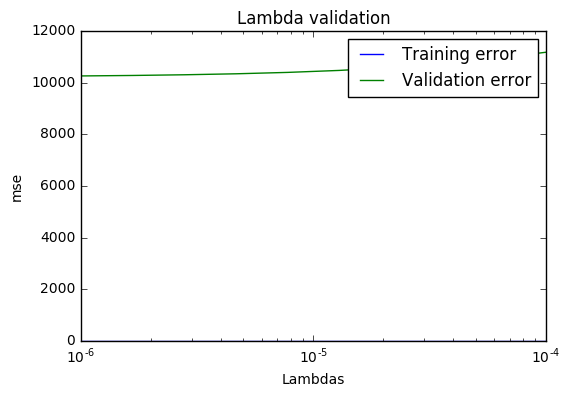

In [93]:
#lambda validation

lambdas = np.logspace(-6, -4, 10)
k_fold = 5
mean_train_mse = []
mean_cv_mse = []

k_indices = build_k_indices(y_train, k_fold,seed = 1)
for lamb in lambdas:
    
    train_mse = []
    cv_mse = []
    #k fold
    for k in range(k_fold):
        x_cv = x_train[k_indices[k]]
        y_cv = y_train[k_indices[k]]
        #remove
        rem_indice = k_indices[~(np.arange(k_indices.shape[0])==k)]
        #set them in a vector
        rem_indice = rem_indice.reshape(-1)
        x_train_fold = x_train[rem_indice]
        y_train_fold = y_train[rem_indice]
    
        #get the ones in the matrix
        x_train_poly = build_poly(x_train_fold,1)
        x_cv_poly = build_poly(x_cv,1)
        
        mse_train,w = ridge_regression(y_train_fold, x_train_poly, lamb)
        mse_cv = calculate_loss(y_cv,x_cv_poly,w)
        train_mse.append(mse_train)
        cv_mse.append(mse_cv)
        
    mean_train_mse.append(np.mean(train_mse))
    mean_cv_mse.append(np.mean(cv_mse))
    
print("mean_train_mse",mean_train_mse)
print("mean_cv_mse",mean_cv_mse)
    #mse_val = compute_loss(y_cv,x_cv_poly, w)

    #mse_train.append(mse)
    #mse_cv.append(mse_val)
    
    #print("lambda={l:.5f}, Validation MSE={tr:.4f}".format(
        #l=lamb, tr=mse_val))
    
p=plt.semilogx(lambdas,mean_train_mse,lambdas,mean_cv_mse)
plt.title("Lambda validation") 
plt.legend(p, ["Training error","Validation error"])
plt.xlabel('Lambdas')
plt.ylabel('mse')
plt.show()

#best_lambda = 0.0139
#mse_train,weight = ridge_regression(y_train,x_train, best_lambda)
#mse_test = compute_loss(y_test,x_test,weight)
#print("mse train",mse_train)
#print("mse test",mse_test)

degree 1
8
degree 2
8
degree 3
8
degree 4
8
degree 5
8
degree 6
8
degree 7
8
degree 8
8


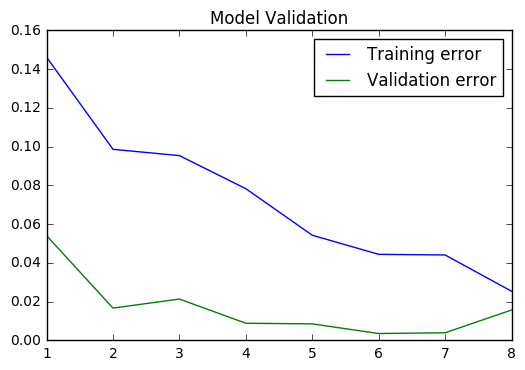

8
mse train 0.0986431597789
mse test 0.554792992231


In [78]:
#model validation

degrees = range(1,9)

lambda_ = 1
mse_test_model_sel = []
mse_cv_model_sel = []
for degree in degrees:
    print("degree",degree)

    x_train_poly = build_poly(x_train,degree)
    x_cv_poly = build_poly(x_cv,degree)

    mse,weight = ridge_regression(y_train,x_train_poly, lambda_)
    mse_test_model_sel.append(mse)
    
    mse_cv = compute_loss(y_cv,x_cv_poly,weight)
    mse_cv_model_sel.append(mse_cv)
    
p = plt.plot(degrees,mse_test_model_sel,degrees,mse_cv_model_sel)
plt.title("Model Validation") 
plt.legend(p, ["Training error","Validation error"])
plt.show()

best_degree = 2
x_train_poly = build_poly(x_train,best_degree)
x_test_poly = build_poly(x_test,best_degree)
mse_train,weight = ridge_regression(y_train,x_train_poly, lambda_)
mse_test = compute_loss(y_test,x_test_poly,weight)

print("mse train",mse_train)
print("mse test",mse_test)

In [74]:
#************** logistic regression ****************#
max_iters = 1
gamma = 0.000001
lambda_ = 0.016
mse,weight = reg_logistic_regression(y_test, x_test, lambda_, gamma, max_iters)
print(mse)
print(weight)

IndexError: tuple index out of range

## Test of methods

In [46]:
mse_train = compute_loss(y_train,x_train,weight)
print(mse_train)
#calculate pourcentage of prediction
y_pred = predict_labels(weight, x_test)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])

0.340930466472
Correct pourcentage predition = 0.57796


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)